In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
data=pd.read_csv('insurance.csv')

In [3]:
data

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500


In [4]:
df= pd.DataFrame(data)

In [5]:
type(df)

pandas.core.frame.DataFrame

In [6]:
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


<AxesSubplot:>

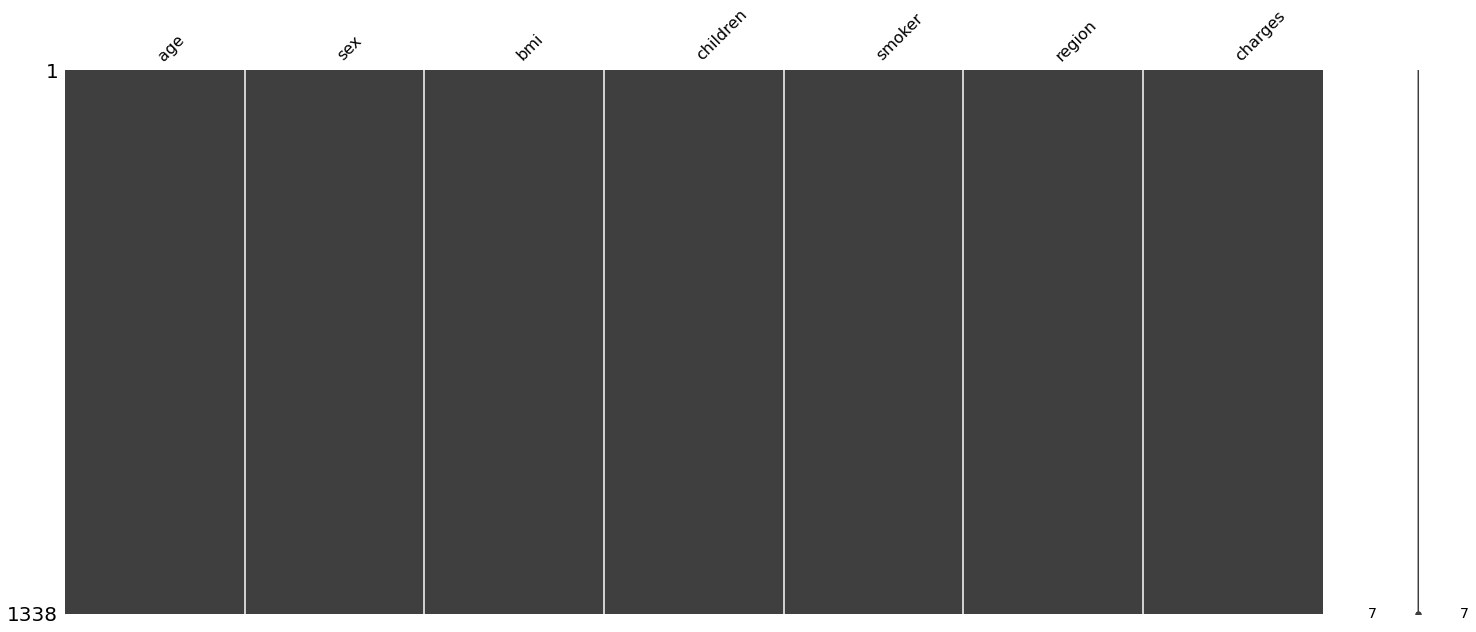

In [7]:
import missingno as msno

msno.matrix(df)

In [8]:
df.isna().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

In [9]:
df['sex'].unique()

array(['female', 'male'], dtype=object)

In [10]:
df['smoker'].unique()

array(['yes', 'no'], dtype=object)

In [11]:
df['region'].unique()

array(['southwest', 'southeast', 'northwest', 'northeast'], dtype=object)

In [12]:
df['children'].unique()

array([0, 1, 3, 2, 5, 4], dtype=int64)

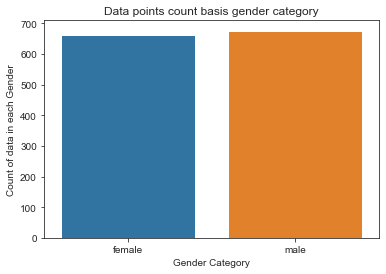

In [13]:
sns.set_style('ticks')
sns.countplot(x='sex',data=df)
plt.ylabel('Count of data in each Gender')
plt.xlabel('Gender Category')
plt.title('Data points count basis gender category')
plt.show()

In [14]:
len(df)

1338

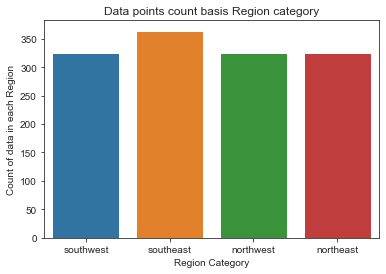

In [15]:
# sns.set_style('ticks')
sns.countplot(x='region',data=df)
plt.ylabel('Count of data in each Region')
plt.xlabel('Region Category')
plt.title('Data points count basis Region category')
plt.show()

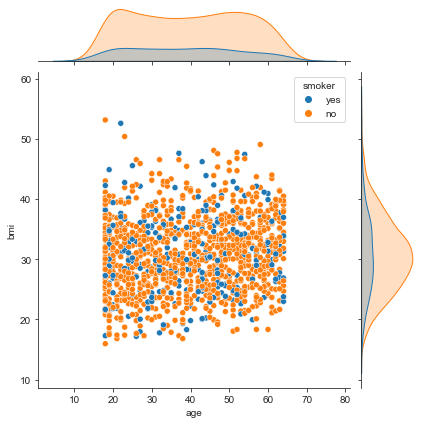

In [16]:
sns.jointplot(x='age',y='bmi',data=df,hue='smoker',kind='scatter')

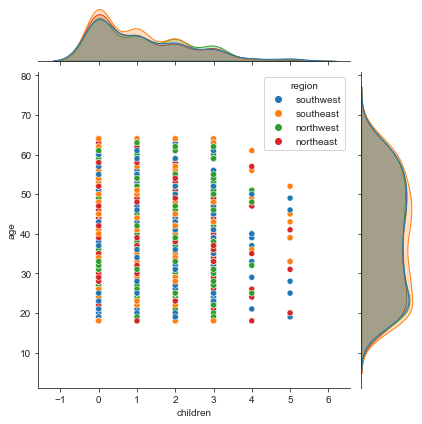

In [17]:
sns.jointplot(x='children',y='age',data=df,hue='region')

sex is a Categorical Column
smoker is a Categorical Column
region is a Categorical Column


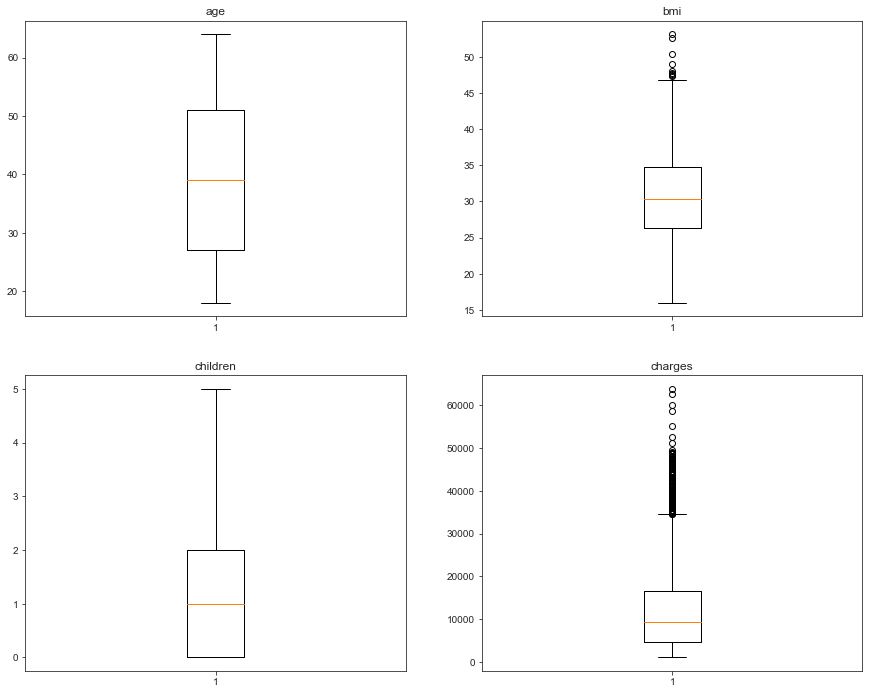

In [18]:
plt.figure(figsize = (15,25))
count = 1
for col in df:
    if(df[col].dtype == 'O'):
         print('{} is a Categorical Column'.format(col))
    else:
        plt.subplot(4,2,count)
        plt.boxplot(df[col])
        plt.title(col)
        count +=1
        
plt.show()

In [19]:
print("Old Shape: ", df.shape)


'''determining 25th and 75th percentile of the data'''

Q1 = np.percentile(df['bmi'], 25,
                   interpolation = 'midpoint')
 
Q3 = np.percentile(df['bmi'], 75,
                   interpolation = 'midpoint')
IQR = Q3 - Q1
  
# Upper bound
upper = np.where(df['bmi'] >= (Q3+1.5*IQR))
# Lower bound
lower = np.where(df['bmi'] <= (Q1-1.5*IQR))
 
''' Removing the Outliers '''
df.drop(upper[0], inplace = True)
df.drop(lower[0], inplace = True)
 
print("New Shape: ", df.shape)

Old Shape:  (1338, 7)
New Shape:  (1329, 7)


{'whiskers': [<matplotlib.lines.Line2D at 0x2833c9026a0>,
 'caps': [<matplotlib.lines.Line2D at 0x2833c902eb0>,
 'boxes': [<matplotlib.lines.Line2D at 0x2833c89e4c0>],
 'medians': [<matplotlib.lines.Line2D at 0x2833c8fc0a0>],
 'fliers': [<matplotlib.lines.Line2D at 0x2833c8fc1f0>],
 'means': []}

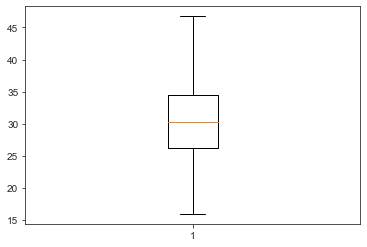

In [20]:
plt.boxplot(df['bmi'])

In [21]:
df.corr()

,age,bmi,children,charges
age,1.000000,0.114686,0.043041,0.302022
bmi,0.114686,1.000000,0.017355,0.193196
children,0.043041,0.017355,1.000000,0.069739
charges,0.302022,0.193196,0.069739,1.000000


<AxesSubplot:>

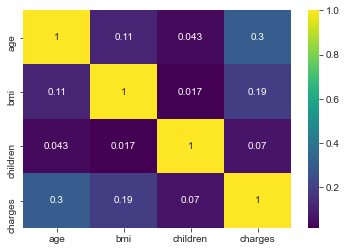

In [22]:
sns.heatmap(df.corr(),annot=True,cmap='viridis')

In [23]:
X= df.iloc[:,:-1]

In [24]:
X

,age,sex,bmi,children,smoker,region
0,19,female,27.900,0,yes,southwest
1,18,male,33.770,1,no,southeast
2,28,male,33.000,3,no,southeast
3,33,male,22.705,0,no,northwest
4,32,male,28.880,0,no,northwest
...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest
1334,18,female,31.920,0,no,northeast
1335,18,female,36.850,0,no,southeast
1336,21,female,25.800,0,no,southwest


In [25]:
y= df['charges']

In [26]:
y

0       16884.92400
1        1725.55230
2        4449.46200
3       21984.47061
4        3866.85520
           ...     
1333    10600.54830
1334     2205.98080
1335     1629.83350
1336     2007.94500
1337    29141.36030
Name: charges, Length: 1329, dtype: float64

In [27]:
# Feature encoding
X=pd.get_dummies(X)

In [28]:
X

,age,bmi,children,sex_female,sex_male,smoker_no,smoker_yes,region_northeast,region_northwest,region_southeast,region_southwest
0,19,27.900,0,1,0,0,1,0,0,0,1
1,18,33.770,1,0,1,1,0,0,0,1,0
2,28,33.000,3,0,1,1,0,0,0,1,0
3,33,22.705,0,0,1,1,0,0,1,0,0
4,32,28.880,0,0,1,1,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...
1333,50,30.970,3,0,1,1,0,0,1,0,0
1334,18,31.920,0,1,0,1,0,1,0,0,0
1335,18,36.850,0,1,0,1,0,0,0,1,0
1336,21,25.800,0,1,0,1,0,0,0,0,1


In [29]:
# Label encoding (dependent vriable) is used only for output

from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
y = le.fit_transform(y)

In [30]:
#splitting into train and test
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = 0.2,random_state = 0)

In [31]:
#convert all numerical values to a standdard scale
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train= sc.fit_transform(X_train)
X_test= sc.fit_transform(X_test)

In [32]:
import pickle
import os

In [35]:
scaler_path=os.path.join('D:\Insurance_ML_Project','models/scaler.pkl')
with open(scaler_path,'wb') as scaler_file:
    pickle.dump(sc,scaler_file)

In [36]:
#creating linear regression model
from sklearn.linear_model import LinearRegression
model = LinearRegression()

In [37]:
model.fit(X_train,y_train)

LinearRegression()

In [38]:
y_predict= model.predict(X_test)

In [39]:
#checking the r2score
from sklearn.metrics import r2_score
r2_score(y_test,y_predict)

0.6317357720737573

In [41]:
import joblib
model_path=os.path.join('D:\Insurance_ML_Project','models/mlr.sav')
joblib.dump(model,model_path)

['D:\\Insurance_ML_Project\\models/mlr.sav']